<a href="https://www.kaggle.com/mahmoudhassanmahmoud/heart-disease-uci-prediction?scriptVersionId=88422573" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
heart=pd.read_csv("../input/heart-disease-uci/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
X=heart.drop("target",axis=1)
y=heart["target"]

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
ImputedModule = SimpleImputer(missing_values = 0, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)


#X Data
print('X Data is \n' , X[:10])

#y Data
print('y Data is \n' , y[:10])

X Data is 
 [[ 63.           1.           3.         145.         233.
    1.           1.02564103 150.           1.           2.3
    1.5035461    1.7265625    1.        ]
 [ 37.           1.           2.         130.         250.
    1.           1.         187.           1.           3.5
    1.5035461    1.7265625    2.        ]
 [ 41.           1.           1.         130.         204.
    1.           1.02564103 172.           1.           1.4
    2.           1.7265625    2.        ]
 [ 56.           1.           1.         120.         236.
    1.           1.         178.           1.           0.8
    2.           1.7265625    2.        ]
 [ 57.           1.           1.83125    120.         354.
    1.           1.         163.           1.           0.6
    2.           1.7265625    2.        ]
 [ 57.           1.           1.83125    140.         192.
    1.           1.         148.           1.           0.4
    1.           1.7265625    1.        ]
 [ 56.           1.   

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

#showing data
print('X \n' , X[:10])
print('y \n' , y[:10])

X 
 [[0.70833333 0.         1.         0.48113208 0.24429224 0.
  0.02564103 0.60305344 0.         0.36065574 0.5035461  0.2421875
  0.        ]
 [0.16666667 0.         0.5        0.33962264 0.28310502 0.
  0.         0.88549618 0.         0.55737705 0.5035461  0.2421875
  0.5       ]
 [0.25       0.         0.         0.33962264 0.17808219 0.
  0.02564103 0.77099237 0.         0.21311475 1.         0.2421875
  0.5       ]
 [0.5625     0.         0.         0.24528302 0.25114155 0.
  0.         0.81679389 0.         0.1147541  1.         0.2421875
  0.5       ]
 [0.58333333 0.         0.415625   0.24528302 0.52054795 0.
  0.         0.70229008 0.         0.08196721 1.         0.2421875
  0.5       ]
 [0.58333333 0.         0.415625   0.43396226 0.15068493 0.
  0.         0.58778626 0.         0.04918033 0.         0.2421875
  0.        ]
 [0.5625     0.         0.         0.43396226 0.38356164 0.
  0.02564103 0.6259542  0.         0.19672131 0.         0.2421875
  0.5       ]
 [0.3125 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (203, 13)
X_test shape is  (100, 13)
y_train shape is  (203,)
y_test shape is  (100,)


In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=90,max_depth=4,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)
95
#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])
print("score of mmodel is :",RandomForestClassifierModel.score(X_test,y_test))

RandomForestClassifierModel Train Score is :  0.9211822660098522
RandomForestClassifierModel Test Score is :  0.83
RandomForestClassifierModel features importances are :  [0.09159455 0.         0.07943469 0.0699473  0.0658686  0.
 0.01638115 0.14635473 0.         0.14961451 0.09645269 0.08454832
 0.19980346]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [1 1 1 1 1 1 0 1 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.30524488 0.69475512]
 [0.2260718  0.7739282 ]
 [0.23716112 0.76283888]
 [0.35177119 0.64822881]
 [0.17188962 0.82811038]
 [0.09417406 0.90582594]
 [0.67043171 0.32956829]
 [0.47490645 0.52509355]
 [0.76696785 0.23303215]
 [0.87067243 0.12932757]]
score of mmodel is : 0.83


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
GBCModel = GradientBoostingClassifier(n_estimators=90,max_depth=1,random_state=33) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
print('GBCModel features importances are : ' , GBCModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)
print('Predicted Value for GBCModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for GBCModel is : ' , y_pred_prob[:10])
print("model score is:",GBCModel.score(X_test,y_test))

GBCModel Train Score is :  0.8669950738916257
GBCModel Test Score is :  0.84
GBCModel features importances are :  [0.01069264 0.         0.13311922 0.03074815 0.0097274  0.
 0.         0.10175626 0.         0.13054926 0.11727522 0.10040008
 0.36573177]
----------------------------------------------------
Predicted Value for GBCModel is :  [1 1 1 1 1 1 0 1 0 0]
Prediction Probabilities Value for GBCModel is :  [[0.27220853 0.72779147]
 [0.11146559 0.88853441]
 [0.3782902  0.6217098 ]
 [0.28421407 0.71578593]
 [0.07692817 0.92307183]
 [0.14242403 0.85757597]
 [0.77266169 0.22733831]
 [0.46204074 0.53795926]
 [0.85734586 0.14265414]
 [0.93836146 0.06163854]]
model score is: 0.84


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Confusion Matrix is : 
 [[35 11]
 [ 5 49]]


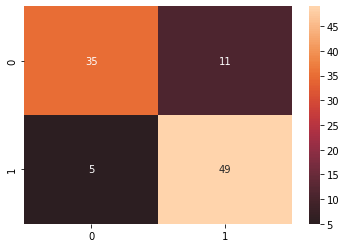

In [18]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,annot=True)
plt.show()